In [1]:
import sys

sys.path.append("../")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

from sklearn.decomposition import PCA

In [24]:
path = "/scratch/work/luongn1/digirhythm/data/interim/momo/"
rule = "5T"
df = pd.read_csv(path + f"application_{rule}.csv")

# Regex pattern to match the column names
pattern = r"^count:(comm|leisure|socialmedia|work)"

# Filter columns based on the pattern
filtered_columns = [col for col in df.columns if re.match(pattern, col)]
groupby_cols = ["user", "group"]
behav_df = df.copy()[groupby_cols + filtered_columns]

behav_df["day_in_study"] = behav_df.groupby("user").cumcount()
behav_df.fillna(0)

,user,group,count:comm:0000,count:comm:0005,count:comm:0010,count:comm:0015,count:comm:0020,count:comm:0025,count:comm:0030,count:comm:0035,...,count:work:2315,count:work:2320,count:work:2325,count:work:2330,count:work:2335,count:work:2340,count:work:2345,count:work:2350,count:work:2355,day_in_study
0,5DWiLmu6c6u7,control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5DWiLmu6c6u7,control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,5DWiLmu6c6u7,control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,5DWiLmu6c6u7,control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,5DWiLmu6c6u7,control,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12897,zO6UTTlQxLNJ,mdd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,464
12898,zO6UTTlQxLNJ,mdd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,465
12899,zO6UTTlQxLNJ,mdd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,466
12900,zO6UTTlQxLNJ,mdd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,467


In [25]:
def assign_app_use(df, rule):
    # Extract hour endings
    if rule == "5T":
        endings = [
            f"{hour:02d}{minute:02d}"
            for hour in range(24)
            for minute in range(0, 60, 5)
        ]

    elif rule == "1H":
        endings = [str(i).zfill(2) for i in range(24)]

    # Group columns by ending
    column_groups = {
        ending: [col for col in df.columns if col.endswith(ending)]
        for ending in endings
    }

    for ending, columns in column_groups.items():
        df[f"duration:off:{ending}"] = 1 - df[columns].sum(axis=1)

    # Group columns by ending
    column_groups = {
        ending: [col for col in df.columns if col.endswith(ending)]
        for ending in endings
    }

    for ending, columns in column_groups.items():
        # Find the column with the maximum value for each row within the group
        max_cols = df[columns].idxmax(axis=1)

        # Initialize the group values to 0
        df[columns] = 0

        # Set the maximum values to 1
        for row, col in enumerate(max_cols):
            df[col].iloc[row] = 1

    return df


def sort_cols(rule):
    # Initialize the list of activities and hours
    activities = ["comm", "socialmedia", "leisure", "work", "off"]

    # Extract hour endings
    if rule == "5T":
        endings = [str(i * 5).zfill(4) for i in range(288)]
        hours = [f"{i:02d}" for i in range(288)]
    elif rule == "1H":
        hours = [f"{i:02d}" for i in range(24)]

    # Create the sorted list of column names
    sorted_columns = []
    for activity in activities:
        for hour in hours:
            # Skip 'socialmedia:00' and 'off:00' as they are not in the provided list
            if (activity == "socialmedia" or activity == "off") and hour == "00":
                continue
            sorted_columns.append(f"duration:{activity}:{hour}")

    # Now sorted_columns contains the sorted column titles
    return sorted_columns


app_behav_df = assign_app_use(behav_df, rule)

/share/apps/anaconda-ci/fgci-centos7-generic/software/anaconda/2020-03-tf1/f43b17a3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [52]:
median_behav_df = behav_df.groupby(["user", "group"]).mean()

# Exclude day in study
median_behav_df = median_behav_df.drop(columns=["day_in_study"])

# Split group
control_median_behav_df = median_behav_df[
    median_behav_df.index.get_level_values(1) == "control"
]
mdd_median_behav_df = median_behav_df[
    median_behav_df.index.get_level_values(1) == "mdd"
]

app_behav_df.to_csv("binary_app_use.csv", index=False)

In [44]:
median_behav_df

,,count:comm:0000,count:comm:0005,count:comm:0010,count:comm:0015,count:comm:0020,count:comm:0025,count:comm:0030,count:comm:0035,count:comm:0040,count:comm:0045,...,duration:off:2310,duration:off:2315,duration:off:2320,duration:off:2325,duration:off:2330,duration:off:2335,duration:off:2340,duration:off:2345,duration:off:2350,duration:off:2355
user,group,,,,,,,,,,,,,,,,,,,,,
0HFyQsNTPNBu,mdd,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,...,0.818182,0.818182,1.000000,1.000000,1.000000,0.909091,0.818182,0.909091,0.909091,0.909091
0xNpSktSAvGC,mdd,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1AdLnqvRKUwe,mdd,0.030651,0.030651,0.022989,0.034483,0.011494,0.011494,0.011494,0.007663,0.011494,0.007663,...,0.923372,0.900383,0.900383,0.927203,0.934866,0.931034,0.946360,0.946360,0.946360,0.934866
2NtvG4WqOd1S,mdd,0.019231,0.057692,0.038462,0.000000,0.076923,0.019231,0.057692,0.038462,0.019231,0.057692,...,0.903846,0.884615,0.884615,0.961538,0.923077,0.884615,0.942308,0.923077,0.884615,0.846154
3noC1OdWbTjA,mdd,0.011080,0.008310,0.008310,0.013850,0.008310,0.002770,0.008310,0.002770,0.005540,0.002770,...,0.886427,0.891967,0.916898,0.914127,0.886427,0.900277,0.927978,0.947368,0.952909,0.958449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vC2-2ajT7-1L,mdd,0.122951,0.096311,0.090164,0.100410,0.081967,0.073770,0.081967,0.088115,0.069672,0.065574,...,0.750000,0.766393,0.760246,0.752049,0.745902,0.788934,0.747951,0.743852,0.786885,0.758197
wuYxxSDu6JY4,mdd,0.006969,0.003484,0.006969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.905923,0.898955,0.912892,0.902439,0.905923,0.930314,0.930314,0.923345,0.926829,0.926829
wxzd30CsS09m,mdd,0.009479,0.004739,0.000000,0.009479,0.000000,0.000000,0.000000,0.004739,0.000000,0.004739,...,0.966825,0.966825,0.966825,0.966825,0.952607,0.966825,0.962085,0.966825,0.971564,0.990521


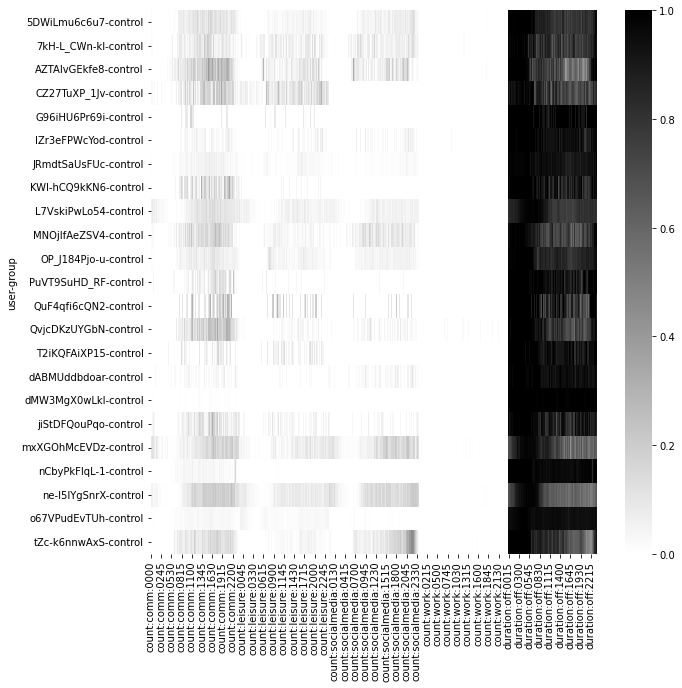

In [46]:
import matplotlib.cm as cm

# Create the heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(control_median_behav_df, cmap=cm.gray_r)

# for i in range(24,len(median_behav_df.columns),24):
#    ax.axvline(i, color='black', lw=2)

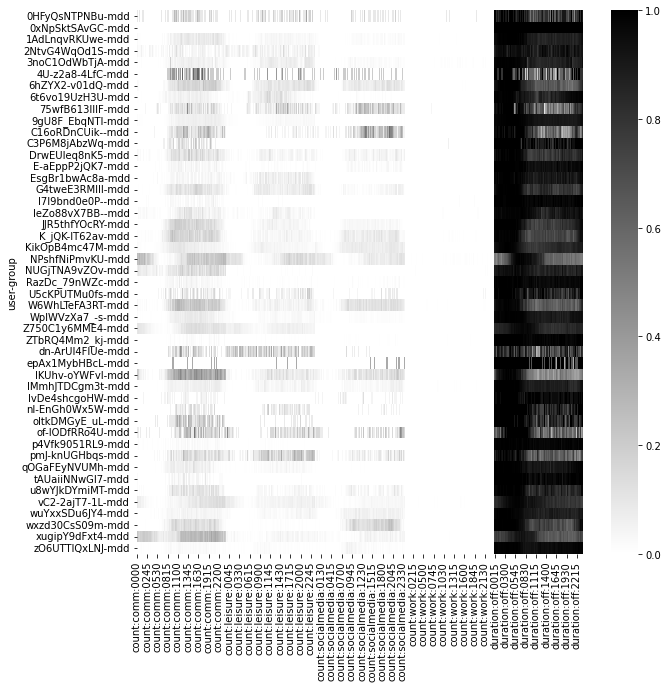

In [47]:
# Create the heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(mdd_median_behav_df, cmap=cm.gray_r)

# for i in range(24,len(median_behav_df.columns),24):
#    ax.axvline(i, color='black', lw=2)

In [49]:
def decompose_eigenvector(df):
    # Mean diff
    number_of_behaviors = 10  # sample.shape[1]
    mean_diff = df.sub(median_behav_df.mean(axis=0), axis=1)
    sample_cov = 1 / (df.shape[0] - 1) * (mean_diff.T.dot(mean_diff))

    pca = PCA(n_components=number_of_behaviors)
    principalComponents = pca.fit_transform(sample_cov)
    print("Explained variance ratio:", pca.explained_variance_ratio_)

    first_eigenbehavior = pd.DataFrame(pca.components_[0]).transpose()
    second_eigenbehavior = pd.DataFrame(pca.components_[1]).transpose()
    third_eigenbehavior = pd.DataFrame(pca.components_[2]).transpose()

    # Assuming 'first_eigenbehavior' is your DataFrame and it has been defined/imported already

    # Define the hour labels
    if rule == "5T":
        hour_labels = [str(i) for i in range(288, 10)]
    else:
        hour_labels = [str(i) for i in range(24)]

    # Set up a grid of subplots
    fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))

    # Define a common color map and normalization instance
    norm = plt.Normalize(
        first_eigenbehavior.values.min(), first_eigenbehavior.values.max()
    )
    cmap = sns.color_palette("bwr", as_cmap=True)

    # Plot each heatmap without color bars and with the common normalization and color map
    for i, behavior in enumerate(
        [first_eigenbehavior, second_eigenbehavior, third_eigenbehavior]
    ):
        # Set column titles for each eigenbehavior
        column_title = f"Eigenbehavior {i + 1}"
        axes[0, i].set_title(column_title)

        sns.heatmap(
            behavior.iloc[:, 0 : 24 * 12],
            ax=axes[0, i],
            cbar=False,
            xticklabels=hour_labels,
            norm=norm,
            cmap=cmap,
        )
        axes[0, i].set_xlabel("Communication")

        sns.heatmap(
            behavior.iloc[:, 24 * 12 : 48 * 12],
            ax=axes[1, i],
            cbar=False,
            xticklabels=hour_labels,
            norm=norm,
            cmap=cmap,
        )
        axes[1, i].set_xlabel("Social media")

        sns.heatmap(
            behavior.iloc[:, 48 * 12 : 72 * 12],
            ax=axes[2, i],
            cbar=False,
            xticklabels=hour_labels,
            norm=norm,
            cmap=cmap,
        )
        axes[2, i].set_xlabel("Leisure")

        sns.heatmap(
            behavior.iloc[:, 72 * 12 : 96 * 12],
            ax=axes[3, i],
            cbar=False,
            xticklabels=hour_labels,
            norm=norm,
            cmap=cmap,
        )
        axes[3, i].set_xlabel("Work")

        sns.heatmap(
            behavior.iloc[:, 96 * 12 : 120 * 12],
            ax=axes[4, i],
            cbar=False,
            xticklabels=hour_labels,
            norm=norm,
            cmap=cmap,
        )
        axes[4, i].set_xlabel("Off")

    # Create an axis for the colorbar on the right side of the figure
    cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])

    # Create the colorbar in the specified axis
    fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 0.9, 1])

    plt.show()

Explained variance ratio: [9.45523229e-01 2.58507613e-02 1.14683227e-02 6.12820364e-03
 3.87961508e-03 2.24670968e-03 1.68532879e-03 8.34656589e-04
 6.24260161e-04 4.37399481e-04]


/share/apps/anaconda-ci/fgci-centos7-generic/software/anaconda/2020-03-tf1/f43b17a3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


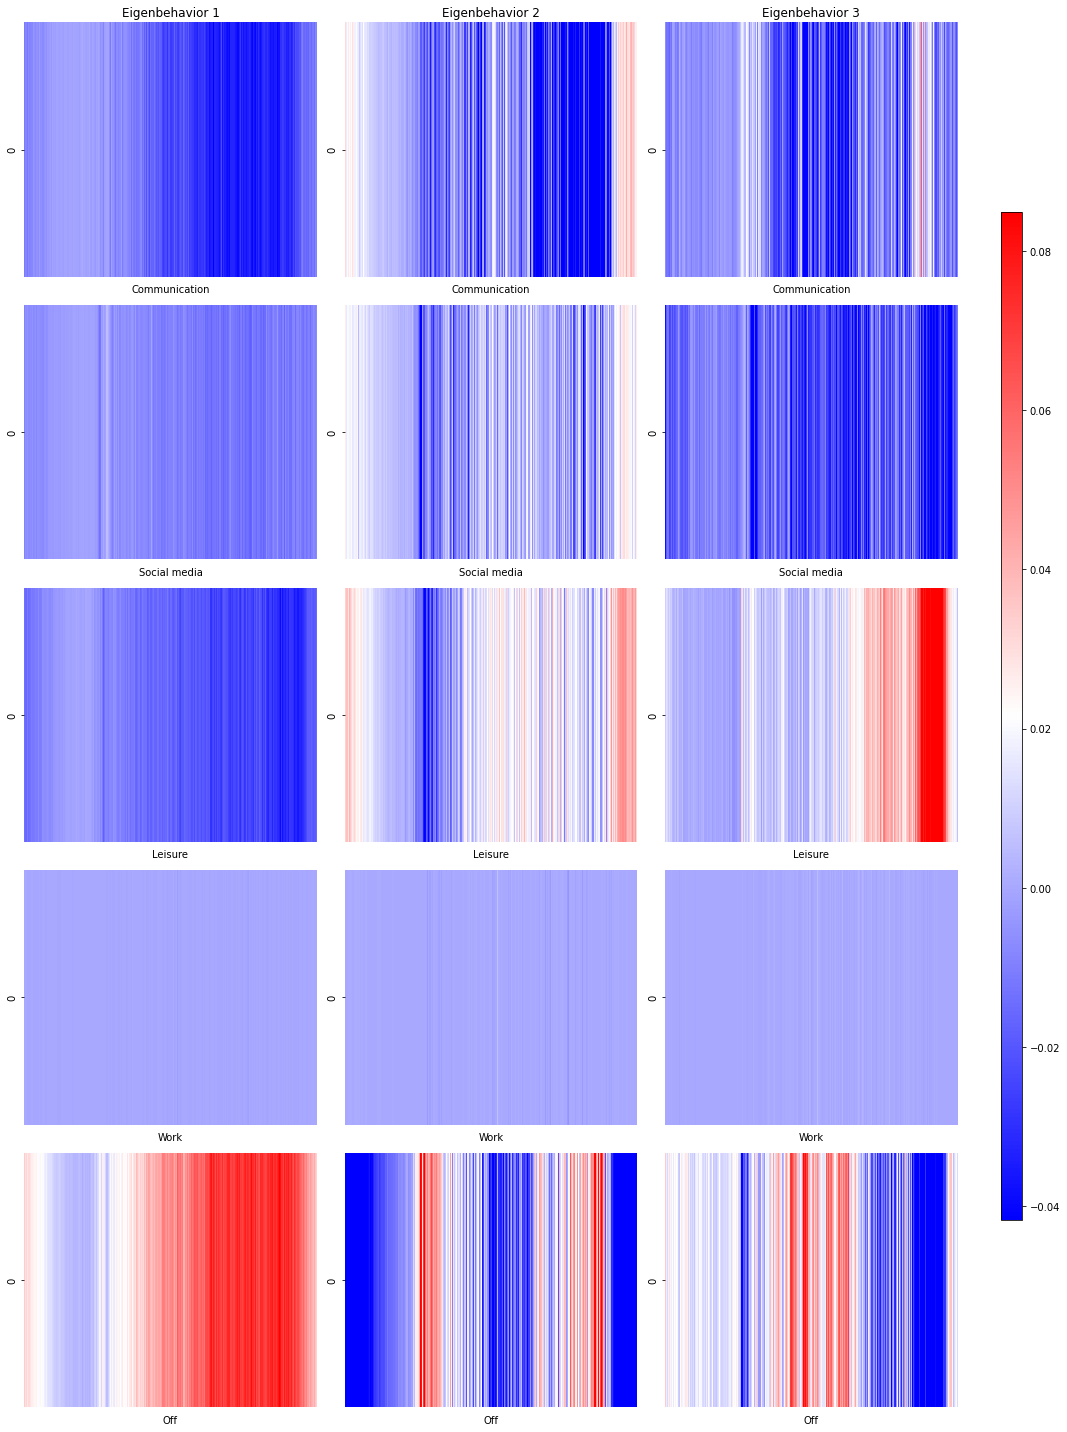

In [50]:
decompose_eigenvector(control_median_behav_df)

Explained variance ratio: [9.31164612e-01 2.67955044e-02 1.50850426e-02 9.33606021e-03
 5.57240573e-03 4.94972447e-03 2.03617634e-03 1.38610473e-03
 1.07919020e-03 8.33943390e-04]


/share/apps/anaconda-ci/fgci-centos7-generic/software/anaconda/2020-03-tf1/f43b17a3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


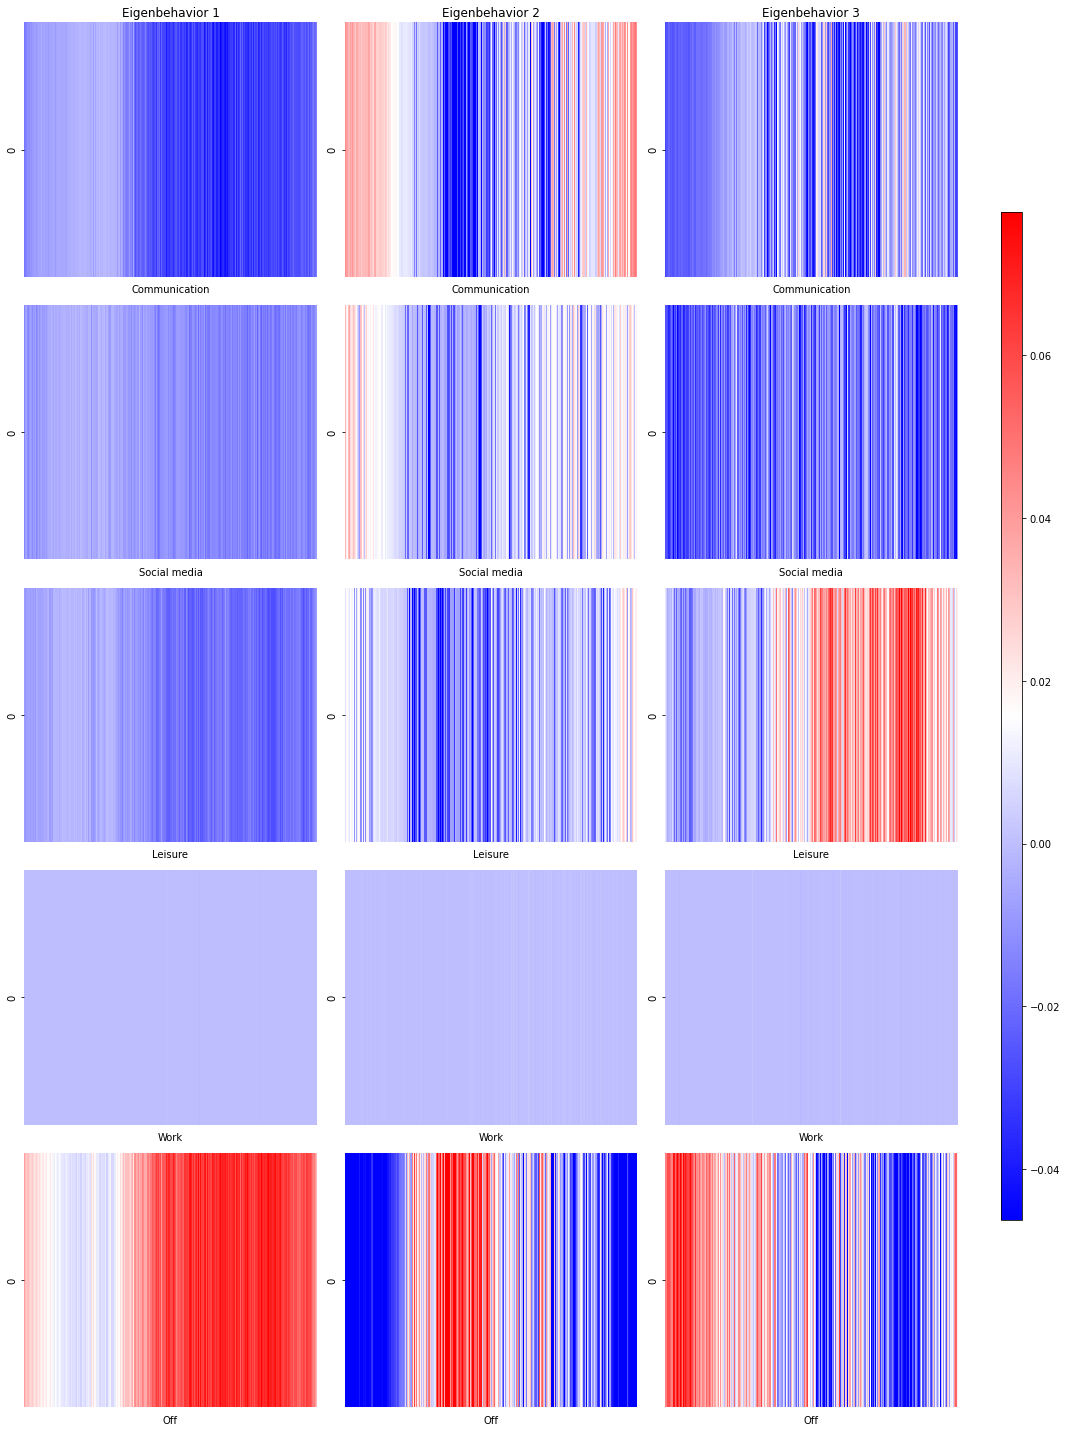

In [51]:
decompose_eigenvector(mdd_median_behav_df)